In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# 设置pandas显示所有列和行
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 设置matplotlib的字体为微软雅黑
plt.rc("font", family='MicroSoft YaHei', weight="bold")

# 读取Excel文件
file_path = 'data.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')



In [10]:
# 定义一个函数来提取数值范围并计算平均值
def extract_numerical_range(value):
    value_str = str(value)  # 确保值是字符串类型
    range_values = [float(v) for v in re.findall(r'\d+\.?\d*', value_str)]
    if range_values:
        return np.mean(range_values)
    else:
        return np.nan

# 应用函数处理'面积', '均价', 和 '总价'列，计算平均值
df['平均面积'] = df['面积'].astype(str).apply(extract_numerical_range)
df['平均均价'] = df['均价'].astype(str).apply(extract_numerical_range)
df['平均总价'] = df['总价'].astype(str).apply(extract_numerical_range)

# 删除原始的'面积', '均价', 和 '总价'列
df_cleaned = df.drop(['面积', '均价', '总价'], axis=1)



In [11]:
# 定义一个函数用于分类区域
def classify_region(address):
    known_regions = ['浦东', '黄浦', '静安', '徐汇', '长宁', '虹口', '杨浦', '普陀', '闵行', '宝山', '嘉定', '金山', '松江', '青浦', '奉贤', '崇明']
    for region in known_regions:
        if region in address:
            return region
    return '上海周边'

# 应用区域分类函数
df_cleaned['区域'] = df_cleaned['地址'].apply(classify_region)

# 显示清洗后的数据
df_cleaned


,名称,地址,户型,平均面积,平均均价,平均总价,区域
0,龙湖青云阙,嘉定/江桥/东至金园一路-骏航路、南至金园二路、西至骏航路-金园三路、北至曹安公路-河流,3室,126.0,62163.0,735.000,嘉定
1,保利虹桥和颂,青浦/重固/上海市青浦区北青公路6265号,2室,94.5,37000.0,350.000,青浦
2,万科海上映象,松江/松江大学城/松江北至广轩路，南至基地边界，东至人民北路，西至定恒路,3室,125.0,59500.0,750.000,松江
3,映翠府,嘉定/嘉定新城/上海市嘉定区双单路18号,3室,115.5,50400.0,565.000,嘉定
4,中国铁建万科朗拾花语,闵行/春申/闵行区银都路与虹梅南路交叉口向西约200米(梅陇镇政府旁边),3室,113.0,77000.0,925.000,闵行
5,保利光合上城,闵行/吴泾/兰莲路168弄；兰莲路167弄,3室,116.0,69900.0,807.000,闵行
6,保利·光合跃城,闵行/颛桥/都会路1800弄,3室,119.0,65000.0,635.000,闵行
7,保利·海上瑧悦,宝山/上大/上海市宝山区丰皓路1288弄,3室,114.5,63000.0,725.000,宝山
8,中海阅麓山,松江/小昆山/文翔路昆水街,2室,97.5,37000.0,260.000,松江
9,香逸铂悦,上海周边/昆山/金变路与远国路交汇处,2室,96.5,24900.0,228.500,上海周边


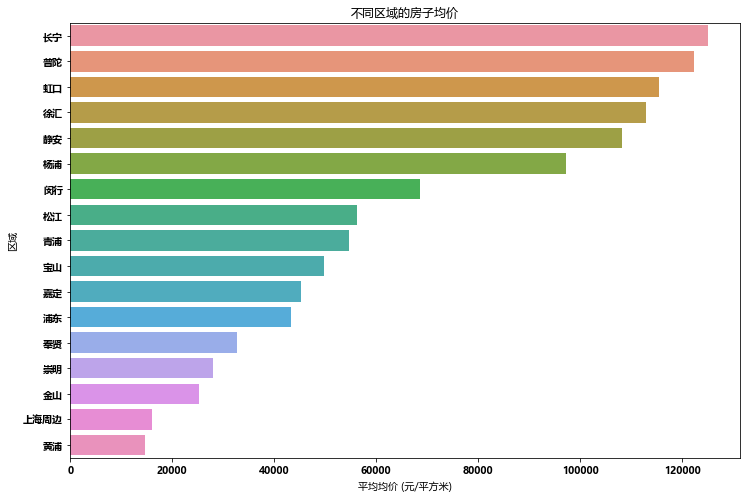

In [12]:
# 将'平均均价'列中的"未知"字符串替换为NaN
df_cleaned['平均均价'].replace('价格待定', np.nan, inplace=True)

# 计算除了'上海周边'以外的城市平均价格
city_avg_price_excl_suburbs = df_cleaned[df_cleaned['区域'] != '上海周边']['平均均价'].astype(float).mean()

# 用各自区域的平均价格填充缺失值
# 如果整个区域的价格都未知，则使用除了郊区外的城市平均价格
df_cleaned['平均均价'] = df_cleaned.groupby('区域')['平均均价'].apply(
    lambda x: x.fillna(x.mean() if not x.mean() == np.nan else city_avg_price_excl_suburbs))

# 如果仍有任何NaN值（在所有价格未知的区域的情况下），用除郊区外的城市平均价格填充
df_cleaned['平均均价'].fillna(city_avg_price_excl_suburbs, inplace=True)

# 按区域分组并计算平均价格
grouped_by_region = df_cleaned.groupby('区域')['平均均价'].mean().reset_index()

# 对结果进行排序
grouped_by_region_sorted = grouped_by_region.sort_values(by='平均均价', ascending=False)

# 可视化各区域的平均价格
plt.figure(figsize=(12, 8))
sns.barplot(x='平均均价', y='区域', data=grouped_by_region_sorted)
plt.title('不同区域的房子均价')
plt.xlabel('平均均价 (元/平方米)')
plt.ylabel('区域')
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# 设置中文和负号的显示问题
plt.rc("font", family='MicroSoft YaHei', weight="bold")
plt.rc('axes', unicode_minus=False)

# 读取Excel文件
file_path = 'data.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')


In [3]:
# 定义提取数字范围的函数
def extract_numerical_range(value):
    value_str = str(value)
    range_values = [float(v) for v in re.findall(r'\d+\.?\d*', value_str)]
    return np.mean(range_values) if range_values else np.nan

# 应用函数处理 '面积', '均价', 和 '总价'
df['平均面积'] = df['面积'].apply(extract_numerical_range)
df['平均均价'] = df['均价'].apply(extract_numerical_range)
df['平均总价'] = df['总价'].apply(extract_numerical_range)

# 删除原始的 '面积', '均价', 和 '总价' 列
df_cleaned = df.drop(['面积', '均价', '总价'], axis=1)

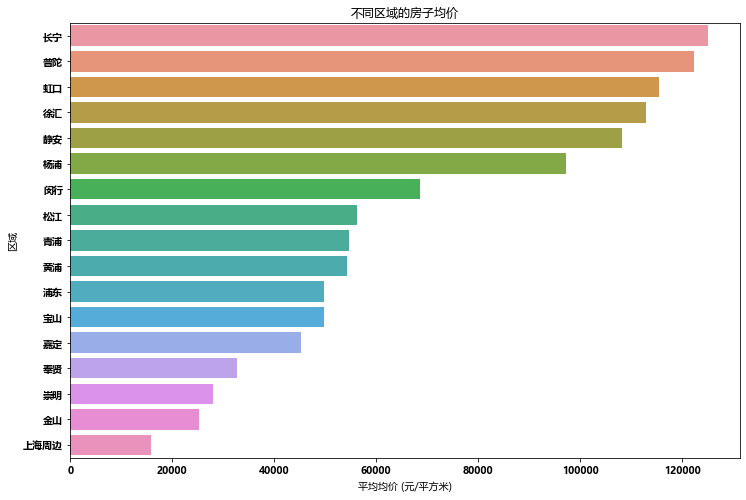

In [4]:
# 提取区域名称，只取地址的第一个字段，如果不在指定区域内，则归类为上海周边
def classify_region(address):
    known_regions = ['浦东', '黄浦', '静安', '徐汇', '长宁', '虹口', '杨浦', '普陀', '闵行', '宝山', '嘉定', '金山', '松江', '青浦', '奉贤', '崇明']
    region = address.split('/')[0]
    return region if region in known_regions else '上海周边'

df_cleaned['区域'] = df_cleaned['地址'].apply(classify_region)

# 将“未知”的均价转换为NaN
df_cleaned['平均均价'].replace('未知', np.nan, inplace=True)
# 转换均价为数值型
df_cleaned['平均均价'] = pd.to_numeric(df_cleaned['平均均价'], errors='coerce')

# 计算除去上海周边后的各区域均价的平均值
city_average_price = df_cleaned[df_cleaned['区域'] != '上海周边']['平均均价'].mean()

# 用各区域均价的平均值填充对应区域的NaN值
df_cleaned['平均均价'] = df_cleaned.groupby('区域')['平均均价'].transform(lambda x: x.fillna(x.mean()))

# 如果某区域全部为NaN，则用除去上海周边后的各区域均价的平均值填充
df_cleaned['平均均价'].fillna(city_average_price, inplace=True)

# 按区域分组并计算平均均价
grouped_by_region = df_cleaned.groupby('区域')['平均均价'].mean().reset_index()

# 可视化不同区域的房子均价
plt.figure(figsize=(12, 8))
sns.barplot(x='平均均价', y='区域', data=grouped_by_region.sort_values(by='平均均价', ascending=False))
plt.title('不同区域的房子均价')
plt.xlabel('平均均价 (元/平方米)')
plt.ylabel('区域')
plt.show()

In [5]:
# 返回分组后的数据以便查看
grouped_by_region_sorted

NameError: name 'grouped_by_region_sorted' is not defined

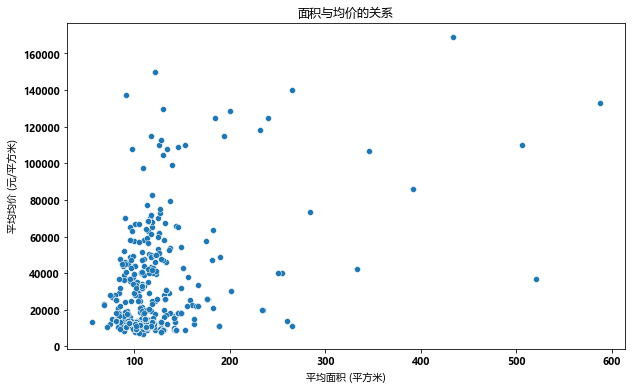

In [6]:
# 使用散点图来可视化面积与均价的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='平均面积', y='平均均价')
plt.title('面积与均价的关系')
plt.xlabel('平均面积 (平方米)')
plt.ylabel('平均均价 (元/平方米)')
plt.show()



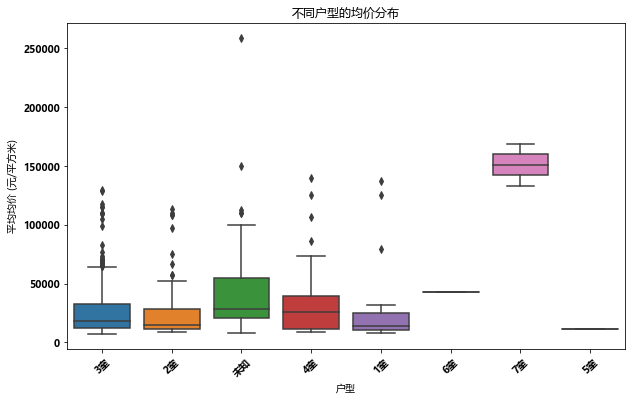

In [7]:
# 分析不同户型的均价分布
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='户型', y='平均均价')
plt.title('不同户型的均价分布')
plt.xlabel('户型')
plt.ylabel('平均均价 (元/平方米)')
plt.xticks(rotation=45)  # 户型标签可能需要旋转以便阅读
plt.show()

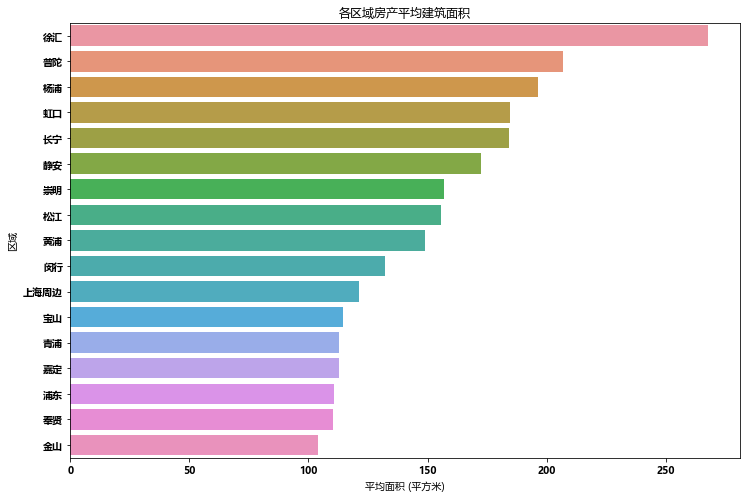

In [8]:
# 按区域分组并计算平均建筑面积
grouped_by_area = df_cleaned.groupby('区域')['平均面积'].mean().reset_index()

# 对结果进行排序
grouped_by_area_sorted = grouped_by_area.sort_values(by='平均面积', ascending=False)

# 可视化各区域的平均建筑面积
plt.figure(figsize=(12, 8))
sns.barplot(x='平均面积', y='区域', data=grouped_by_area_sorted)
plt.title('各区域房产平均建筑面积')
plt.xlabel('平均面积 (平方米)')
plt.ylabel('区域')
plt.show()


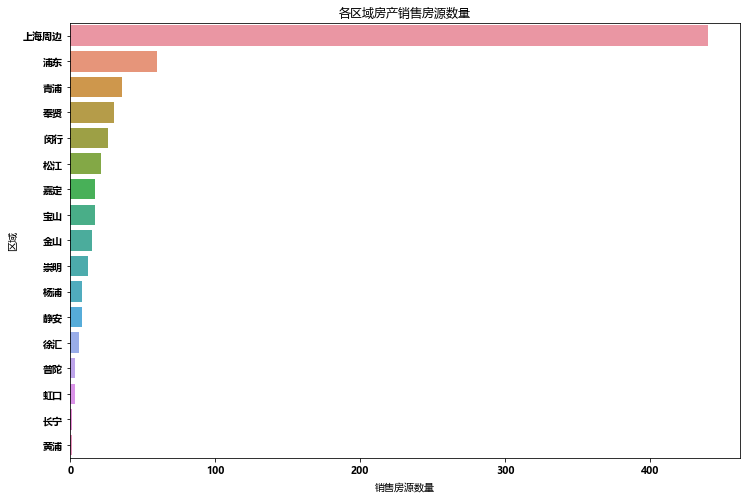

In [12]:
# 分析各区域房产销售房源数量
# 计算每个区域的房源数量
house_count_by_region = df_cleaned['区域'].value_counts().reset_index()
house_count_by_region.columns = ['区域', '销售房源数量']

# 对结果进行排序
house_count_by_region_sorted = house_count_by_region.sort_values(by='销售房源数量', ascending=False)

# 可视化各区域的房源数量
plt.figure(figsize=(12, 8))
sns.barplot(x='销售房源数量', y='区域', data=house_count_by_region_sorted)
plt.title('各区域房产销售房源数量')
plt.xlabel('销售房源数量')
plt.ylabel('区域')
plt.show()

In [13]:
# 返回分组后的数据以便查看
house_count_by_region_sorted

,区域,销售房源数量
0,上海周边,440
1,浦东,60
2,青浦,36
3,奉贤,30
4,闵行,26
5,松江,21
6,嘉定,17
7,宝山,17
8,金山,15
9,崇明,12


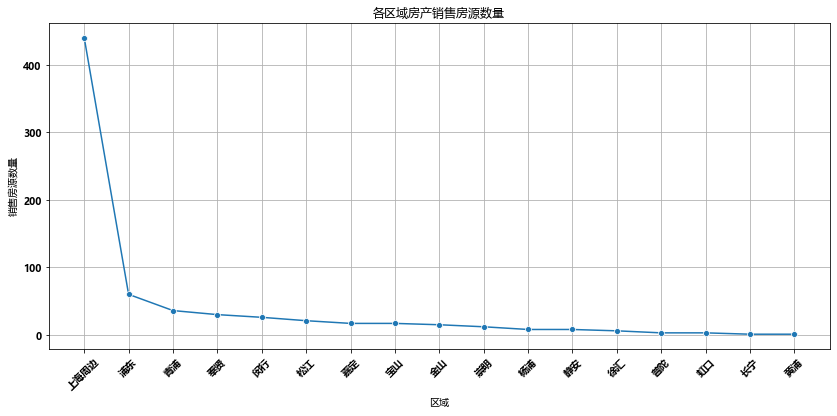

In [14]:
# 使用折线图可视化各区域的房源数量
plt.figure(figsize=(14, 6))
sns.lineplot(data=house_count_by_region_sorted, x='区域', y='销售房源数量', marker='o')
plt.title('各区域房产销售房源数量')
plt.xlabel('区域')
plt.ylabel('销售房源数量')
plt.xticks(rotation=45)  # 旋转x轴标签以便阅读
plt.grid(True)
plt.show()


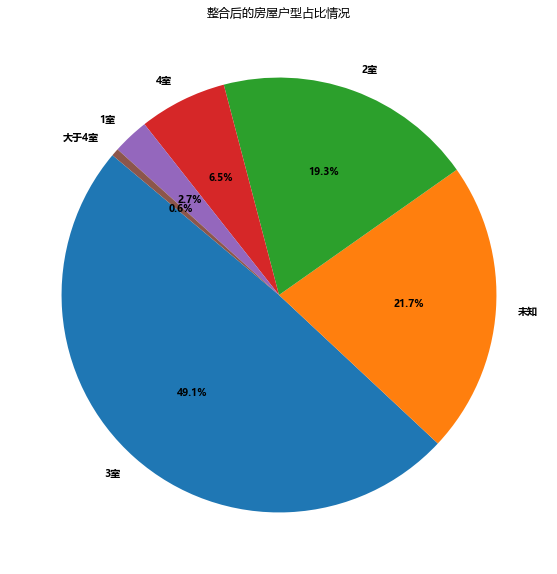

In [15]:
# 分析房产销售房屋户型占比情况
# 计算各户型的数量占比
housetype_counts = df_cleaned['户型'].value_counts()
housetype_percentage = housetype_counts / housetype_counts.sum() * 100


# 将户型为5室、6室、7室的整合为“大于4室”
df_cleaned['户型整合'] = df_cleaned['户型'].replace(['5室', '6室', '7室'], '大于4室')

# 重新计算各户型的数量占比
housetype_integrated_counts = df_cleaned['户型整合'].value_counts()
housetype_integrated_percentage = housetype_integrated_counts / housetype_integrated_counts.sum() * 100

# 使用饼状图可视化整合后的户型占比情况
plt.figure(figsize=(10, 10))
housetype_integrated_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('整合后的房屋户型占比情况')
plt.ylabel('')  # 饼状图不需要y轴标签
plt.show()



In [16]:
# 返回整合后的户型占比数据
housetype_integrated_percentage


3室      49.147727
未知      21.732955
2室      19.318182
4室       6.534091
1室       2.698864
大于4室     0.568182
Name: 户型整合, dtype: float64